# Optimizing Logistic Regression for Fraud Detection using Optuna 
This code investigates how hyperparameter optimization methods — Optuna — affect Logistic Regression performance in detecting fraudulent transactions. The experiment evaluates four variants — Base Logistic Regression, SMOTE-balanced, Random Undersampling and Hybrid (SMOTE + ENN) — and concludes by identifying the best-performing model based on evaluation metrics such as F1-score, ROC-AUC, and PR-AUC.

---

### Related Works and Research Papers

#### References:
1. **Petrlik, I., Lezama, P., Rodriguez, C., Inquilla, R., Reyna-González, J. E., & Esparza, R. (2022)**. Electricity theft detection using machine learning. International Journal of Advanced Computer Science and Applications, 13(12), 420–425. https://doi.org/10.14569/IJACSA.2022.0131251

2. **Khan, Z. A., & Adil, M. (2020)**. Electricity theft detection using supervised learning techniques on smart meter data. Sustainability, 12(19), 8023. https://doi.org/10.3390/su12198023

#### Limitations Identified in the Studies 
- Class imbalance causes Logistic Regression to be biased toward the majority (non-fraud) class.  
- Logistic Regression model was trained with manually set hyperparamters without systematic optimization, which might potentially limit model performance
- Evaluation metrics were limited to precision, recall, F1-score, and support which may not be able to provide a full picture of performance, especially on imbalanced data

#### Our Approach to Overcome These Limitations  
- Used **Optuna** for automated hyperparameter tuning, ensuring better model generalization rather than relying on default settings
- Applied **Sampling Methods** (SMOTE, Random Undersampling, Hybrid(SMOTE+ENN)) before modelling to improve recall and handle imbalance
- Applied **SMOTE** only on training folds (via pipeline) to safely rebalance the dataset without leakage or overfitting.
- Introduced **PR-AUC** metric alongside ROC-AUC for more realistic evaluation on rare fraud cases.  
- Compared baseline and tuned models fairly under identical data splits.

---

### Machine Learning Algorithm Details

- **Algorithms Used:**  
  - Logistic Regression (base model) 
  - Optuna (advanced Bayesian optimization tuner)  
  - SMOTE (Synthetic Minority Oversampling Technique)
  - Random Undersampling
  - Hybrid Sampling (SMOTE + ENN)

- **Why These Algorithms Are Appropriate:**  
  Logistic regression is a widely used and interpretable statistical method used for solving binary classification problems (GeeksforGeeks, 2025), making it suitable as a baseline model for fraud detection. Optuna improves tuning efficiency via sequential model-based optimization and the other three sampling methods are applied to address the class imbalance, improving the detection of minority fraudulent cases.

- **Original Contributions:**
  - Combined both tuning methods under identical experiment settings (with/without SMOTE).  
  - Introduced additional comparison metric (PR-AUC) along with traditional metrics to provide a more realistic evaluation of fraud detection performance.
  - Customized ROC and confusion matrix visualizations with distinctive color themes for clarity.  
  - Evaluated three different sampling methods (Base, SMOTE, Random Undersampling, Hybrid SMOTE+ENN) to determine how different sampling methods would affect the effectiveness of the model
  - using Optuna for hyperparameter tuning to ensure fair and optimized comparisons.
  - Implemented reproducible, leakage-free pipelines integrating scaling, resampling, and model fitting, with fixed random seeds and saved preprocessing steps.

---

### Experiments and Results

- **Multiple Models Implemented:**  
  - Optuna   
  - Optuna with SMOTE
  - Optuna with Random Undersampling 
  - Optuna with Hybrid Sampling (SMOTE + ENN) 

- **Training, Cross-Validation, and Testing:**  
  Each model trained with 5-Fold stratified CV and tested on unseen validation data.  
  Evaluations were conducted using metrics:
  - ROC-AUC  
  - PR-AUC  
  - Precision, Recall, and F1-score for class “1” (fraud)

- **Comparisons and Findings:**  
  - `Base Logistic Regression` performs the best with the highest scores across all evaluation metrics (Precision, F1-Score, Accuracy, ROC-AUC, PR-AUC) except for recall among the 4 Logistic Regression Variants.
  - `RandomUnderSampler` improves recall, but reduced accuracy as it discards a significant portion of non-fraud data, weakening the model's generalisation ability. 
  - `SMOTE` improves recall, which means it is able to identify more fraud cases. However, it can introduce noise, reducing precision.  
  - `Hybrid (SMOTE+ENN)` cleans oversampled noise, leading to a more balanced precision–recall tradeoff and improved fraud detection recall. However, this comes with reduced precision and accuracy, indicating that the model focuses more on catching potential fraud at the expense of misclassifying legitimate cases.

- **Conclusion:**  
  The results indicate that **the Base Logistic Regression model without any sampling methods**, with the highest precision, F1-score, accuracy, PR-AUC and ROC-AUC.
  While SMOTE can address class imbalance by improving recall, it also introduced synthetic noise in this dataset, leading to lower precision and overfitting to synthetic minority samples, thereby reducing real-world generalization.  
  Both Random Undersampling model and Hybrid (SMOTE + ENN) achieved a notable improvement in recall, effectively detecting a larger proportion of fradulent cases. However, this came at the expense of precision, resulting in more false positives — a trade-off that could lead to unnecessary investigations or inconvenience for legitimate users.

  Overall, the **Base Logistic Regression model** shows the **best and most stable performance**, with the highest value for most evaluation metrics across the board. While resampling methods improves recall, it may compromise model precision and real-world applicability.

---

### 🔍 Attribution and Reproducibility

- Code References and Online Resources:
  - Optuna. (n.d.). *Optuna: A hyperparameter optimization framework*. Retrieved November 1, 2025, from https://optuna.org/
  - Imbalanced-learn documentation — Version 0.14.0. (n.d.). *imbalanced-learn*. Retrieved November 1, 2025, from https://imbalanced-learn.org/stable/
  - Scikit-learn. (n.d.). *ROC and classification examples*. Retrieved November 1, 2025, from https://scikit-learn.org/stable/auto_examples/
  - Ismael, H. C. (n.d.). *Dealing with imbalanced datasets using pipelines*. Kaggle. Retrieved November 1, 2025, from https://www.kaggle.com/code/ismaelhc/dealing-with-imbalanced-datasets-using-pipelines
  - EvolutionIQ. (2018, November 29). *Strategies for data imbalance in fraud classifiers*. Retrieved November 1, 2025, from https://www.evolutioniq.com/resources/the-journey-begins
  - Jairi, I. (2024, May 13). The importance of feature scaling in machine learning: Logistic regression for example. Medium. Retrieved October 31, 2025, from https://medium.com/@jairiidriss/the-importance-of-feature-scaling-in-machine-learning-logistic-regression-for-example-b3068f8d3441
  - Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras & TensorFlow (2nd ed.). O’Reilly Media.
  - GeeksforGeeks. (2025, July 23). Logistic regression and the feature scaling ensemble. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/logistic-regression-and-the-feature-scaling-ensemble/
  - Bismi, I. (2023, January 2). Hyper-parameter tuning for machine-learning models using Optuna. Medium. https://medium.com/@iqra.bismi/hyper-parameter-tuning-of-machine-learning-models-using-optuna-f1905547937f
  - scikit-learn developers. (n.d.). sklearn.linear_model.LogisticRegression [Documentation]. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- All visualizations and helper functions were written by our team.
- Random seeds fixed (`random_state=1244`) for consistent reproducibility.


## Logistic Regression Model

#### Data Preparation

In [31]:
import joblib
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    auc,
    precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from collections import Counter

In [32]:
## Import Datasets from our data_preprocessing file
X_train = joblib.load('../data/X_train.pkl')
y_train = joblib.load('../data/y_train.pkl')
X_test = joblib.load( '../data/X_test.pkl')
y_test = joblib.load('../data/y_test.pkl')

In [33]:
X_train.head()

,region,dis,catg,mean_consommation_level_1,median_consommation_level_1,std_consommation_level_1,min_consommation_level_1,max_consommation_level_1,sum_consommation_level_1,std_consommation_level_3,...,active_days,consumption_mean,consumption_std,consumption_max,consumption_sum,max_min_ratio,monthly_consumption_std,avg_monthly_change,max_monthly_change,std_monthly_change
3584,301,62,11,657.541667,547.5,395.373679,0,2000,15781,0.0000,...,4739,674.208333,428.453435,2192,16181,2.192000e+09,360.196356,262.619048,655.300000,341.370073
3721,306,63,11,238.300000,217.0,97.485099,68,385,2383,0.0000,...,1099,238.300000,97.485099,385,2383,5.661765e+00,18.444173,22.875000,35.750000,18.208000
9570,303,62,11,876.200000,773.0,419.118360,520,1600,4381,148.0277,...,1029,1090.400000,613.182925,1940,5452,3.730769e+00,613.182925,920.750000,1252.000000,456.216597
9271,307,62,11,562.500000,574.0,188.705767,56,800,9000,0.0000,...,1830,574.937500,210.681266,999,9199,1.783929e+01,167.257301,232.066667,318.666667,86.434995
1328,103,69,11,97.428571,0.0,271.823761,0,1200,2046,0.0000,...,2666,134.571429,434.580438,1980,2826,1.980000e+09,151.949200,139.500000,327.500000,123.058116


In [34]:
X_train.dtypes

region                         category
dis                            category
catg                           category
mean_consommation_level_1       float64
median_consommation_level_1     float64
std_consommation_level_1        float64
min_consommation_level_1          int64
max_consommation_level_1          int64
sum_consommation_level_1          int64
std_consommation_level_3        float64
max_consommation_level_3          int64
sum_consommation_level_3          int64
mean_consommation_level_4       float64
std_consommation_level_4        float64
max_consommation_level_4          int64
sum_consommation_level_4          int64
sum_counter_coefficient           int64
mode_tarif_type                category
nunique_counter_statue            int64
mode_reading_remarque          category
nunique_reading_remarque          int64
num_invoices                      int64
active_days                       int64
consumption_mean                float64
consumption_std                 float64


#### Encoding and Scaling

Before using the data, categorical features must be transformed into numerical representations as Logistic Regression, like most Machine Learning models, can only operate on numerical inputs.

Hence, we used Target Encoder for ordinal categorical variables and One-Hot Encoder for nominal catgorical variables. We also load a scaler to prepare for feature scaling in the next part.

In [35]:
# Import Encoders
target_encoder = joblib.load('../data/target_encoder.pkl')
one_hot_encoder = joblib.load('../data/one_hot_encoder.pkl')

# Import Scaler
scaler = joblib.load('../data/scaler.pkl')

In [36]:
## Encode Training and Test Set
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

X_train_enc = target_encoder.transform(X_train_enc)
X_test_enc = target_encoder.transform(X_test_enc) 

X_train_enc = one_hot_encoder.transform(X_train_enc)
X_test_enc = one_hot_encoder.transform(X_test_enc)

The **Logistic Regression** algorithm is one of the Machine Learning algorithms that are sensitive to the feature scales and ranges (Jairi Idriss, 2020) as it relies on **Gradient Descent Optimisation** and having features on very different scales would cause the model to take much longer to converge and affect the stability of the model (Géron, 2019). Therefore, feature scaling is necessary to ensure efficient and reliable training.

In [37]:
## Scale Training and Test Set
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

#### Optuna Hyperparameter Optimization

Next, we would do Hyperparameter tuning, which is the process of choosing the optimal values for the hyperparameters of a machine learning model. For Logistic Regression, we decided to use Optuna, which is an open-source hyperparameter optimisation library for machine learning, with a focus on simplicity and efficiency. (Bismi, 2023)
It provides a number of benefits over traditional approaches (eg. GridSearchCV, RandomSearchCV):
- Optuna can support parallel optimisation, reducing time required to find optimal hyperparameter values.
- Optuna can automatically track and store the optimisation process

Specifically, we aim to maximise the ROC-AUC score using 5-fold Stratified Cross-Validation, which ensures balanced class representation in each fold. 

From scikit-learn developers (n.d.), we chose to tune the following hyperparameters
- C (Regularization Strength): Controls the degree of regularization to find the optimal trade-off between bias and variance.
- penalty: Determines the type of regularization — 'l1' (Lasso) for feature selection and sparsity, or 'l2' (Ridge) for stability and smoothness.
- solver: test 'liblinear' and 'saga' as both support l1 and l2 regularization and are efficient for medium-sized datasets.
- max_iter: Controls the maximum number of iterations for model convergence to ensure the optimization process completes without premature stopping.
- class_weight = 'balanced': to tackle the imbalanced data
- fit_intercept = True: standard practice in almost all Logistic Regression model
- random_state = 1244: Ensures same reproducibility across runs and environments.

We also standardized the number of traisl to 30 and set the random seed to 1244 to ensure consistency and reproducibility of results, while also preventing the optimisation process from running too long.

In [38]:
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.01, 100, log = True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 500, 2000, step = 100),
        'class_weight': 'balanced',
        'fit_intercept': True,
        'random_state': 1244
    }

    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1244)

    # Initialize model
    model = LogisticRegression(**params)

    # Evaluate with cross-validation
    scores = cross_val_score(
        model, X_train_scaled, y_train,
        cv = cv,
        scoring = 'roc_auc',
        n_jobs = -1
    )
    return scores.mean()

# Run optimization
if __name__ == "__main__":
    study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed = 1244))
    study.optimize(objective, n_trials = 30)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {:.4f}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


[I 2025-11-01 23:57:43,749] A new study created in memory with name: no-name-6cc61819-c097-4cbc-acd0-183d5f686fb7
[I 2025-11-01 23:58:00,360] Trial 0 finished with value: 0.7504105999749993 and parameters: {'C': 4.716430923288908, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 2000}. Best is trial 0 with value: 0.7504105999749993.
[I 2025-11-01 23:58:07,100] Trial 1 finished with value: 0.7518241634035735 and parameters: {'C': 50.74048913445977, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 1200}. Best is trial 1 with value: 0.7518241634035735.
[I 2025-11-01 23:58:10,823] Trial 2 finished with value: 0.754674360432659 and parameters: {'C': 0.05971673665890828, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 500}. Best is trial 2 with value: 0.754674360432659.
[I 2025-11-01 23:58:18,487] Trial 3 finished with value: 0.7517575380559666 and parameters: {'C': 1.8082432922509135, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 1500}. Best is trial 2 with value: 0.754674360432659.
[I 202

Number of finished trials: 30
Best trial:
  Value: 0.7568
  Params: 
    C: 0.010226439038991827
    penalty: l2
    solver: saga
    max_iter: 1700


Now with the datasets ready for plotting, we can use them to train our Logistic Regression model using encoded features. A threshold of 0.5 is applied to ensure consistency and standardization across all models implemented in our report.

In [39]:
## Train logistic regression model (lr) with Encoding + threshold = 0.5 
best_params = study.best_trial.params
lr = LogisticRegression(**best_params, class_weight = 'balanced', random_state = 1244)
lr.fit(X_train_scaled, y_train)

y_proba = lr.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_proba >= 0.5).astype(int)

print("\nClassification Report (Threshold = 0.5 & Target Encoding):")
print(classification_report(y_test, y_pred_best, digits = 4))

accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy_best:.4f}")
print(f"ROC-AUC: {roc_auc_best:.4f}")

con_mat = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(con_mat)

prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)
print(f"PR-AUC: {pr_auc:.4f}")


Classification Report (Threshold = 0.5 & Target Encoding):
              precision    recall  f1-score   support

           0     0.9801    0.6781    0.8016      2246
           1     0.0906    0.6990    0.1604       103

    accuracy                         0.6790      2349
   macro avg     0.5353    0.6886    0.4810      2349
weighted avg     0.9410    0.6790    0.7735      2349

Accuracy: 0.6790
ROC-AUC: 0.7655
Confusion Matrix:
[[1523  723]
 [  31   72]]
PR-AUC: 0.1243


#### Plots to visualise the performance of base Logistic Regression model with encoding + threshold = 0.5

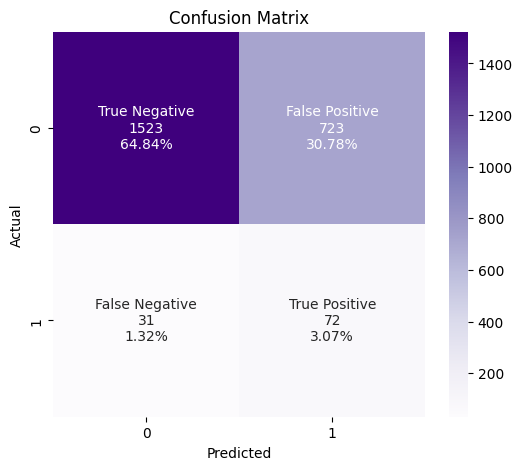

In [40]:
## Confusion Matrix
plt.figure(figsize = (6, 5))
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [value for value in con_mat.flatten()]
percentages = ['{0:.2%}'.format(value) for value in con_mat.flatten()/np.sum(con_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(con_mat, annot = labels, fmt = "", cmap = "Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

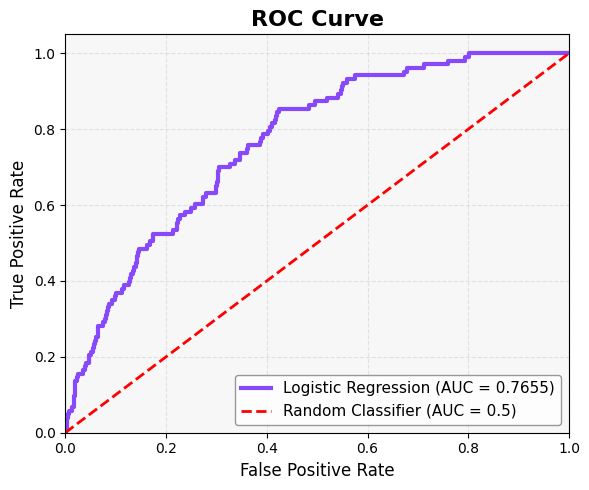

In [41]:
## ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize = (6, 5))
plt.plot(fpr, tpr, color = "#8749FA", linewidth = 3,
         label = f'Logistic Regression (AUC = {roc_auc_best:.4f})')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', linewidth = 2,
         label = 'Random Classifier (AUC = 0.5)')

plt.title('ROC Curve', fontsize = 16, fontweight = 'bold')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 11, frameon = True, facecolor = 'white', edgecolor = 'gray')
plt.grid(alpha = 0.3, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.gca().set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()

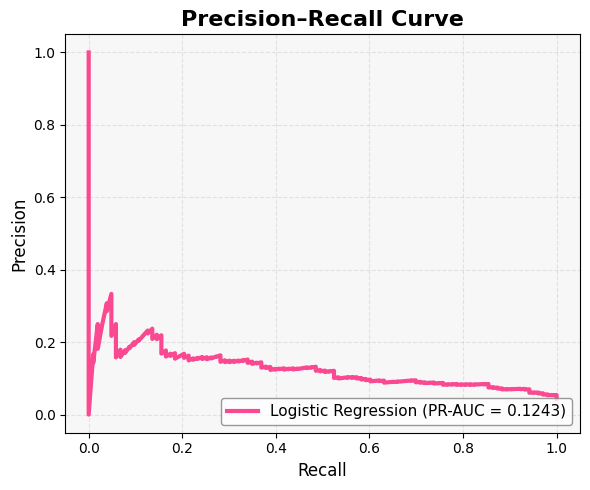

In [42]:
## Precision-recall curve
plt.figure(figsize = (6, 5))
plt.plot(rec, prec, color = "#FA4990", linewidth = 3,
         label = f'Logistic Regression (PR-AUC = {pr_auc:.4f})')

plt.title('Precision–Recall Curve', fontsize = 16, fontweight = 'bold')
plt.xlabel('Recall', fontsize = 12)
plt.ylabel('Precision', fontsize = 12)
plt.legend(loc = 'lower right', fontsize = 11, frameon = True, facecolor = 'white', edgecolor = 'gray')
plt.grid(alpha = 0.3, linestyle = '--')

plt.gca().set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()

## More Methods to deal with Skewed Data

The dataset used is **highly imbalanced** with much more non-fraud cases compared to fraud cases, which causes models to become more biased toward the majority class. Hence, it would have high accuracy but poor detection of fraud cases.

Hence, I tried to experiment with multiple resampling strategies:
- **SMOTE (Synthetic Minority Oversampling Technique):**  
  Artificially create observations in our data set for the minority (fraud) class, making the number of the fraud and non-fraud cases the same as the original number of majority (non-fraud) class.

- **Random Undersampling:**  
  Samples the majority (non-fraud) class to reduce the number of samples, making the number of the fraud and non-fraud cases the same as the original number of minority (fraud) class.

- **SMOTE + ENN (Edited Nearest Neighbours) -- Hybrid Sampling:**  
  As SMOTE artifically creates new observations, it may introduce noises within the dataset. ENN would then clean the noisy samples generated by SMOTE when it is interpolating new points between marginal outliers and inliters.


#### Method 1 - Deal with Oversampling (SMOTE)

In [43]:
print(X_train.columns)

Index(['region', 'dis', 'catg', 'mean_consommation_level_1',
       'median_consommation_level_1', 'std_consommation_level_1',
       'min_consommation_level_1', 'max_consommation_level_1',
       'sum_consommation_level_1', 'std_consommation_level_3',
       'max_consommation_level_3', 'sum_consommation_level_3',
       'mean_consommation_level_4', 'std_consommation_level_4',
       'max_consommation_level_4', 'sum_consommation_level_4',
       'sum_counter_coefficient', 'mode_tarif_type', 'nunique_counter_statue',
       'mode_reading_remarque', 'nunique_reading_remarque', 'num_invoices',
       'active_days', 'consumption_mean', 'consumption_std', 'consumption_max',
       'consumption_sum', 'max_min_ratio', 'monthly_consumption_std',
       'avg_monthly_change', 'max_monthly_change', 'std_monthly_change'],
      dtype='object')


In [44]:
all_numeric_cols = X_train.columns.tolist()

# Build full pipeline with SMOTE + Logistic Regression 
lr_SMOTE = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state = 1244, sampling_strategy = 'auto')),
    ('model', LogisticRegression(**best_params, class_weight = 'balanced', random_state = 1244))
])

# Fit pipeline on training data 
lr_SMOTE.fit(X_train, y_train)

# Evaluate on test data 
y_pred = lr_SMOTE.predict(X_test)
y_pred_prob = lr_SMOTE.predict_proba(X_test)[:, 1]

print("\nClassification Report (SMOTE + Encoded):")
print(classification_report(y_test, y_pred, digits = 4))

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

prec, rec, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(rec, prec)
print(f"PR-AUC: {pr_auc:.4f}")


Classification Report (SMOTE + Encoded):
              precision    recall  f1-score   support

           0     0.9825    0.6483    0.7811      2246
           1     0.0888    0.7476    0.1588       103

    accuracy                         0.6526      2349
   macro avg     0.5356    0.6979    0.4699      2349
weighted avg     0.9433    0.6526    0.7538      2349

Accuracy: 0.6526
ROC-AUC: 0.7564
PR-AUC: 0.1233


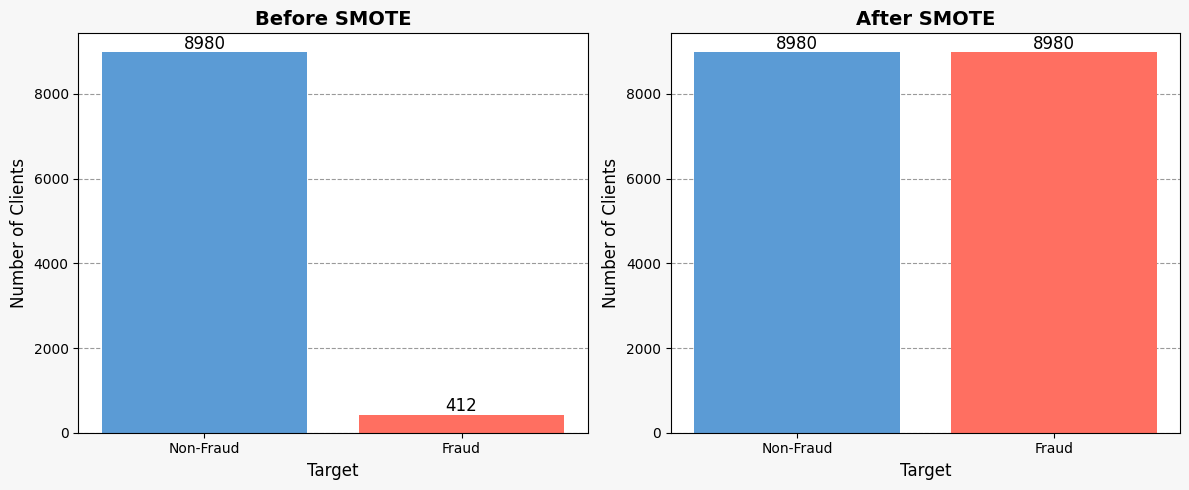

In [45]:
## Bar Graph - Before and After SMOTE
# Visualise class distribution before and after

fig, axes = plt.subplots(1, 2, figsize=(12,5), facecolor='#f7f7f7')

# Count target values BEFORE SMOTE
original_counts = y_train.value_counts().sort_index()

# Count target values AFTER SMOTE
smote_X, smote_y = lr_SMOTE.named_steps['smote'].fit_resample(X_train, y_train)
smote_counts = dict(sorted(Counter(smote_y).items()))

for ax, (title, counts) in zip(axes, {'Before SMOTE': original_counts, 'After SMOTE': smote_counts}.items()):
    if isinstance(counts, dict):
        keys, values = counts.keys(), counts.values()
    else:  # pandas Series
        keys, values = counts.index, counts.values

    ax.bar(keys, values, color = ['#5b9bd5', '#ff6f61'], zorder = 2)
    ax.set_xticks(list(keys))
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Target', fontsize=12)
    ax.set_ylabel('Number of Clients', fontsize=12)
    
    for i, v in enumerate(values):
        ax.text(i, v + max(values)*0.01, str(v), ha = 'center', fontsize = 12)
    
    ax.grid(axis = 'y', linestyle = '--', alpha = 0.7, color = '#707070')

plt.tight_layout()
plt.show()

#### Method 2 - Deal with Undersampling (RandomUnderSampler)

In [46]:
lr_undersam = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state = 1244)),
    ('model', LogisticRegression(**best_params, class_weight = 'balanced', random_state = 1244))
])

lr_undersam.fit(X_train, y_train)
y_pred_undersam = lr_undersam.predict(X_test)
y_pred_prob_undersam = lr_undersam.predict_proba(X_test)[:, 1]

print("\nClassification Report (RandomUnderSampler + Encoded):")
print(classification_report(y_test, y_pred_undersam, digits = 4))

accuracy = accuracy_score(y_test, y_pred_undersam)
roc_auc = roc_auc_score(y_test, y_pred_prob_undersam)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

prec, rec, _ = precision_recall_curve(y_test, y_pred_prob_undersam)
pr_auc = auc(rec, prec)
print(f"PR-AUC: {pr_auc:.4f}")



Classification Report (RandomUnderSampler + Encoded):
              precision    recall  f1-score   support

           0     0.9819    0.6514    0.7832      2246
           1     0.0885    0.7379    0.1580       103

    accuracy                         0.6552      2349
   macro avg     0.5352    0.6946    0.4706      2349
weighted avg     0.9427    0.6552    0.7558      2349

Accuracy: 0.6552
ROC-AUC: 0.7643
PR-AUC: 0.1223


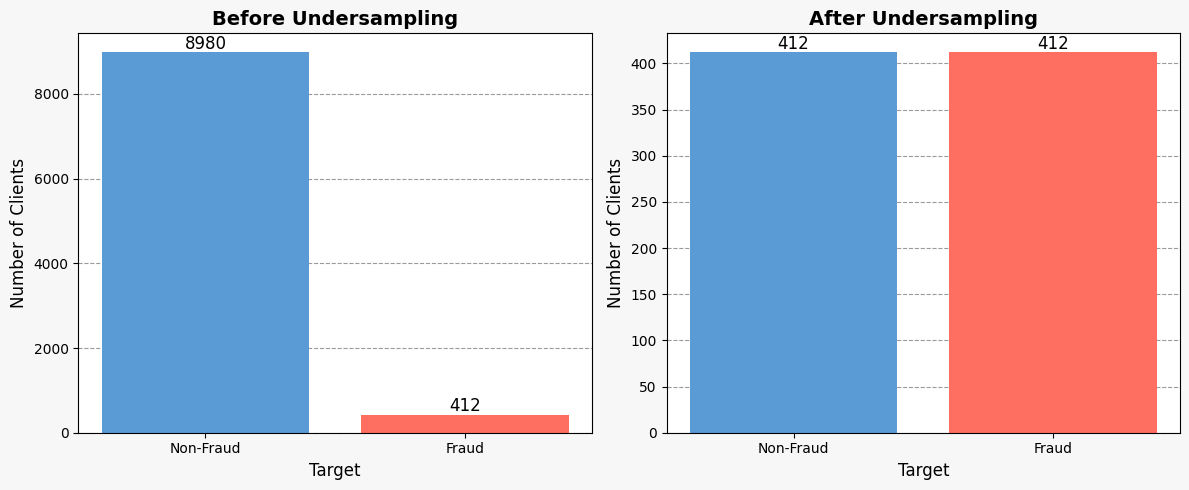

In [47]:
## Bar Graph - Before and After RandomUnderSampling

# Visualise class distribution before and after
fig, axes = plt.subplots(1, 2, figsize = (12, 5), facecolor = '#f7f7f7')

# Count target values BEFORE SMOTE
original_counts = y_train.value_counts().sort_index()  # Series

# Count target values AFTER SMOTE
undersam_X, undersam_y = lr_undersam.named_steps['undersample'].fit_resample(X_train, y_train)
undersam_counts = dict(sorted(Counter(undersam_y).items()))  # dict

for ax, (title, counts) in zip(axes, {'Before Undersampling': original_counts, 'After Undersampling': undersam_counts}.items()):
    if isinstance(counts, dict):
        keys, values = counts.keys(), counts.values()
    else:  # pandas Series
        keys, values = counts.index, counts.values

    ax.bar(keys, values, color=['#5b9bd5', '#ff6f61'], zorder=2)
    ax.set_xticks(list(keys))
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Target', fontsize=12)
    ax.set_ylabel('Number of Clients', fontsize=12)
    
    for i, v in enumerate(values):
        ax.text(i, v + max(values)*0.01, str(v), ha='center', fontsize=12)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='#707070')

plt.tight_layout()
plt.show()

#### Method 3 - Deal with Hybrid (SMOTE + ENN)

In [48]:
lr_hybrid = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('smote_enn', SMOTEENN(random_state = 1244)),
    ('model', LogisticRegression(**best_params, class_weight = 'balanced', random_state = 1244))
])

lr_hybrid.fit(X_train, y_train)
y_pred_hybrid = lr_hybrid.predict(X_test)
y_pred_prob_hybrid = lr_hybrid.predict_proba(X_test)[:, 1]

print("\nClassification Report (SMOTE-ENN + Encoded):")
print(classification_report(y_test, y_pred_hybrid))

accuracy = accuracy_score(y_test, y_pred_hybrid)
roc_auc = roc_auc_score(y_test, y_pred_prob_hybrid)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

prec, rec, _ = precision_recall_curve(y_test, y_pred_prob_hybrid)
pr_auc = auc(rec, prec)
print(f"PR-AUC: {pr_auc:.4f}")


Classification Report (SMOTE-ENN + Encoded):
              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2246
           1       0.09      0.81      0.16       103

    accuracy                           0.63      2349
   macro avg       0.54      0.71      0.46      2349
weighted avg       0.95      0.63      0.74      2349

Accuracy: 0.6288
ROC-AUC: 0.7568
PR-AUC: 0.1181


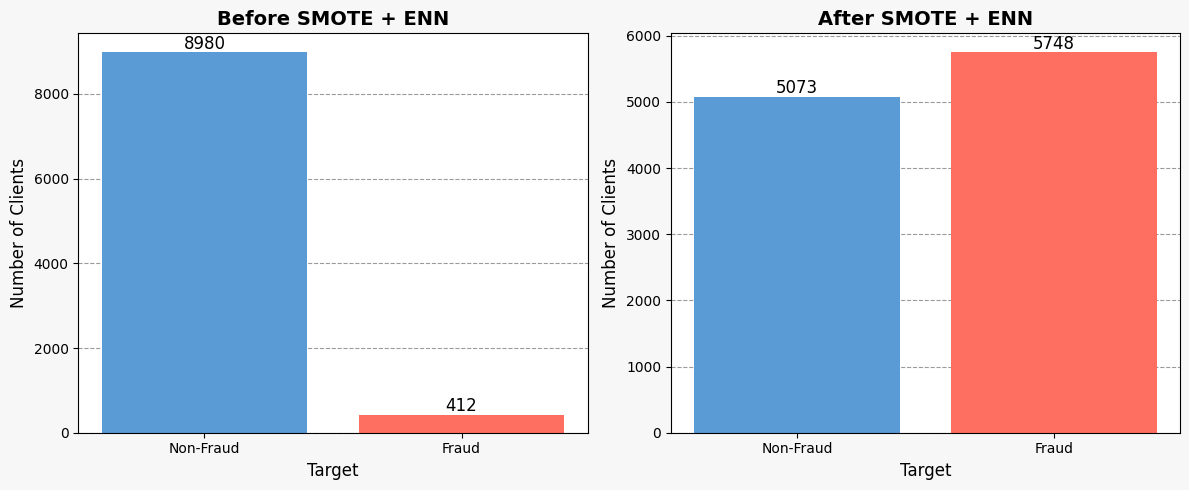

In [49]:
## Bar Graph - Before and After SMOTE + ENN

# Visualise class distribution before and after
fig, axes = plt.subplots(1, 2, figsize = (12, 5), facecolor='#f7f7f7')

# Count target values BEFORE SMOTE
original_counts = y_train.value_counts().sort_index()

# Count target values AFTER SMOTE
hybrid_X, hybrid_y = lr_hybrid.named_steps['smote_enn'].fit_resample(X_train, y_train)
hybrid_counts = dict(sorted(Counter(hybrid_y).items()))

for ax, (title, counts) in zip(axes, {'Before SMOTE + ENN': original_counts, 'After SMOTE + ENN': hybrid_counts}.items()):
    if isinstance(counts, dict):
        keys, values = counts.keys(), counts.values()
    else:
        keys, values = counts.index, counts.values

    ax.bar(keys, values, color = ['#5b9bd5', '#ff6f61'], zorder = 2)
    ax.set_xticks(list(keys))
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])
    ax.set_title(title, fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Target', fontsize = 12)
    ax.set_ylabel('Number of Clients', fontsize = 12)
    
    for i, v in enumerate(values):
        ax.text(i, v + max(values)*0.01, str(v), ha = 'center', fontsize = 12)
    
    ax.grid(axis = 'y', linestyle = '--', alpha = 0.7, color = '#707070')

plt.tight_layout()
plt.show()

#### Summary: Comparison between Basic LR Model VS SMOTE (Oversampling) VS Random UnderSampling VS ENN + SMOTE (Hybrid)

In [54]:
## Table to compare the evaluation metrics among the 4 LR model variants
# Collect model performance metrics
results = []

def evaluate_model(name, y_test, y_pred, y_pred_prob):
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average = 'binary'
    )
    support = int(sum(y_test))

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    prec, rec, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(rec, prec)

    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc,
        'Support': support,
    })

# Evaluate all 4 logistic regression variants 
evaluate_model('Base Logistic Regression', y_test, y_pred_best, y_proba)
evaluate_model('SMOTE', y_test, y_pred, y_pred_prob)
evaluate_model('RandomUnderSampler', y_test, y_pred_undersam, y_pred_prob_undersam)
evaluate_model('SMOTE + ENN', y_test, y_pred_hybrid, y_pred_prob_hybrid)


# Create & Style the Results Table 
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
results_df = results_df.sort_values(by='PR-AUC', ascending=False)

# Create styled table
styled_table = (
    results_df.style
    .background_gradient(cmap='Purples', subset=['Precision', 'Recall', 'F1 Score', 'Accuracy', 'ROC-AUC', 'PR-AUC'])
    .format({
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1 Score': '{:.4f}',
        'Accuracy': '{:.4f}',
        'ROC-AUC': '{:.4f}',
        'PR-AUC': '{:.4f}',
        'Support': '{:,.0f}'
    })
    .set_table_styles([
        # Header row styling
        {'selector': 'thead th',
         'props': [
             ('font-size', '13px'),
             ('text-align', 'center'),
             ('background-color', '#1e3a8a'),
             ('color', 'white'),
             ('border-bottom', '2px solid #0f172a')
         ]},
        # Caption styling
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '15px'),
             ('font-weight', 'bold'),
             ('color', "#a2b4e4"),
             ('text-align', 'center')
         ]},
        # Support column neutral dark grey color
        {'selector': 'tbody td.col0, tbody td.col1, tbody td.col2, tbody td.col3, tbody td.col4, tbody td.col5, tbody td.col6',
         'props': [('text-align', 'center')]}
    ])
    .set_properties(subset=['Support'], **{
        'color': '#333',
        'background-color': "#6e6d6d",
        'font-weight': 'bold',
        'text-align': 'center'
    })
    .set_caption("Logistic Regression Model Comparison")
)

display(styled_table)


,Model,Precision,Recall,F1 Score,Accuracy,ROC-AUC,PR-AUC,Support
0,Base Logistic Regression,0.0906,0.6990,0.1604,0.6790,0.7655,0.1243,103
1,SMOTE,0.0888,0.7476,0.1588,0.6526,0.7564,0.1233,103
2,RandomUnderSampler,0.0885,0.7379,0.1580,0.6552,0.7643,0.1223,103
3,SMOTE + ENN,0.0888,0.8058,0.1599,0.6288,0.7568,0.1181,103


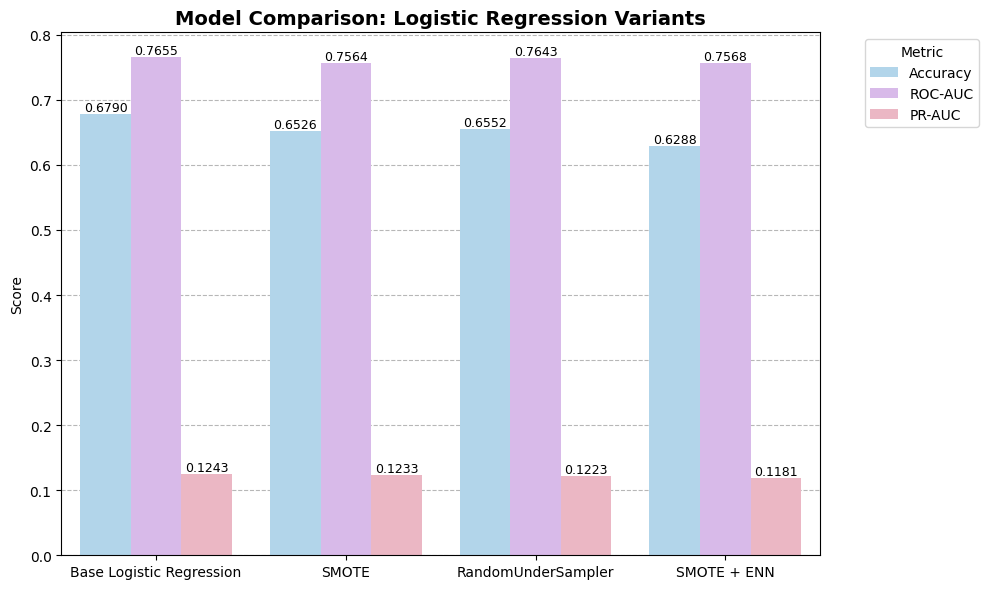

In [51]:
## Model Comparision Visualization (Bar Chart)
plt.figure(figsize=(10, 6))

# Melt the dataframe for plotting
results_melted = results_df.reset_index().melt(
    id_vars = 'Model',
    value_vars = ['Accuracy', 'ROC-AUC', 'PR-AUC'],
    var_name = 'Metric', value_name = 'Score'
)

pastel_palette = {
    'Accuracy': "#a9d7f3",
    'ROC-AUC': "#dab2f1",
    'PR-AUC': "#f4aec0"
}

# Plot
ax = sns.barplot(
    data = results_melted,
    x = 'Model',
    y = 'Score',
    hue = 'Metric',
    palette = pastel_palette,
    zorder = 2
)

# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero bars
        ax.annotate(
            f'{height:.4f}',
            (p.get_x() + p.get_width() / 2., height),
            ha = 'center',
            va = 'bottom',
            fontsize = 9
        )
    
plt.title('Model Comparison: Logistic Regression Variants', fontsize = 14, fontweight = 'bold')
plt.ylabel('Score')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.legend(title = 'Metric', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5, color = '#707070')
plt.tight_layout()
plt.show()

## Save Model

After evaluating four **Logistic Regression variants** (`Base Logistic Regression`, `SMOTE-balanced`, `Random Undersampling`, `Hybrid SMOTE+ENN`), we realised that the **base Logistic Regression model** achieved the best overall performance. 

Therefore, this model is saved as the **baseline model** for comparison against other distinct machine learning models that we have implemented, including `Gradient Boosted Trees (LightGBM)`, `Neural Network`, and `Random Forest`. 

In [52]:
joblib.dump(lr, '../data/lr_model.pkl')

['../data/lr_model.pkl']